<a href="https://colab.research.google.com/github/HarshitManik/Glucos_sparameter_frequencey_prediction/blob/main/Glucose_sparameter_frequency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Read the CSV file into a DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"Uploaded file: {filename}")
    print(df.head())  # Display the first few rows of the dataframe


Saving Project 01 datasheet.csv to Project 01 datasheet.csv
Uploaded file: Project 01 datasheet.csv
   Unnamed: 0  BGL    FREQ       S11  S11_Scaled  S11_Derivative  S11_Mean  \
0           0  100  0.0150 -7.396270    0.842571             NaN -6.349324   
1       10003  100  0.0225 -7.397664    0.842538             NaN       NaN   
2           1  100  0.0300 -7.399058    0.842505       -0.185888 -6.349324   
3       10004  100  0.0375 -7.401338    0.842451       -0.244961       NaN   
4           2  100  0.0450 -7.403619    0.842398       -0.304034 -6.349324   

    S11_Std    S11_Min   S11_Max  
0  5.586062 -17.520899 -0.719465  
1       NaN        NaN       NaN  
2  5.586062 -17.520899 -0.719465  
3       NaN        NaN       NaN  
4  5.586062 -17.520899 -0.719465  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

   Unnamed: 0  BGL    FREQ       S11  S11_Scaled  S11_Derivative  S11_Mean  \
0           0  100  0.0150 -7.396270    0.842571             NaN -6.349324   
1       10003  100  0.0225 -7.397664    0.842538             NaN       NaN   
2           1  100  0.0300 -7.399058    0.842505       -0.185888 -6.349324   
3       10004  100  0.0375 -7.401338    0.842451       -0.244961       NaN   
4           2  100  0.0450 -7.403619    0.842398       -0.304034 -6.349324   

    S11_Std    S11_Min   S11_Max  
0  5.586062 -17.520899 -0.719465  
1       NaN        NaN       NaN  
2  5.586062 -17.520899 -0.719465  
3       NaN        NaN       NaN  
4  5.586062 -17.520899 -0.719465  
Unnamed: 0           0
BGL                  0
FREQ                 0
S11                  0
S11_Scaled           0
S11_Derivative      20
S11_Mean          9993
S11_Std           9993
S11_Min           9993
S11_Max           9993
dtype: int64
         Unnamed: 0           BGL          FREQ           S11    S11_Scaled  \

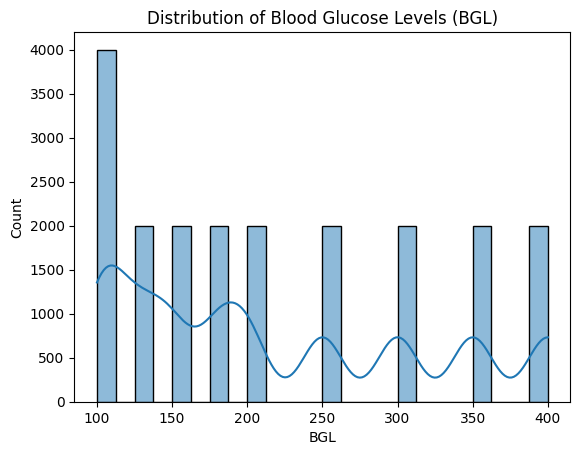

In [ ]:
# Load the data
data = pd.read_csv('Project 01 datasheet.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

# Check the distribution of the target variable (BGL)
sns.histplot(data['BGL'], kde=True)
plt.title('Distribution of Blood Glucose Levels (BGL)')
plt.show()

In [ ]:
# Drop rows with missing values if any
data = data.dropna()

# Separate features (S-parameters) and target (BGL)
X = data.drop(columns=['BGL'])
y = data['BGL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 37159.7227 - val_loss: 1289.1749
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1176.8301 - val_loss: 440.6548
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 569.3859 - val_loss: 193.4842
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 426.2218 - val_loss: 110.1925
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 374.5747 - val_loss: 66.5337
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 378.5739 - val_loss: 44.8390
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 335.1313 - val_loss: 45.1920
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 342.1571 - val_loss: 31.1551
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 334.1520 - val_loss: 21.9050
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 343.7111 - val_loss: 28.8911
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 317.8179 - val_loss: 25.3

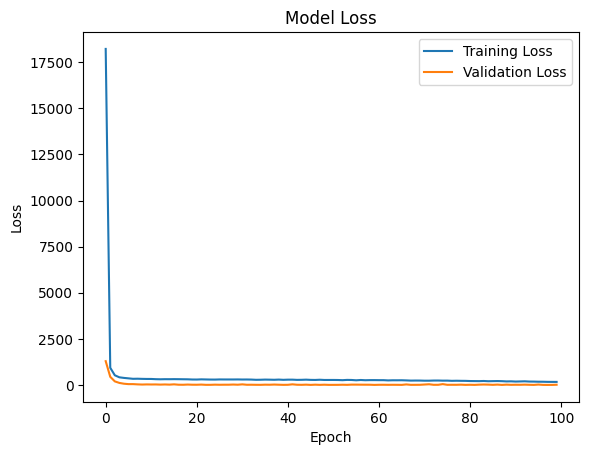

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 11.303340911865234
R-squared: 0.9988371729850769


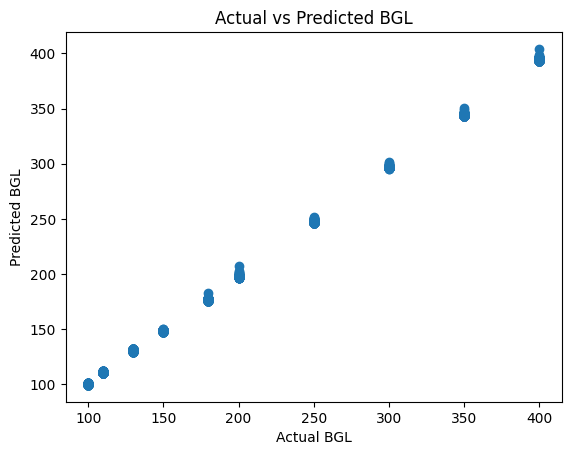

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual BGL')
plt.ylabel('Predicted BGL')
plt.title('Actual vs Predicted BGL')
plt.show()

In [ ]:
# Save the model
model.save('bgl_predictor_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('bgl_predictor_model.h5')

# Predict on new data (example)
new_data = np.array([[...]])  # Replace with actual new data
new_data_scaled = scaler.transform(new_data)
predictions = loaded_model.predict(new_data_scaled)

print(predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'ellipsis'